## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 27.02.2024
- remaining points: last lab session before or on Tuesday, 05.03.2023

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and asnwers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [1]:
import matplotlib.pyplot as plt
import torch

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

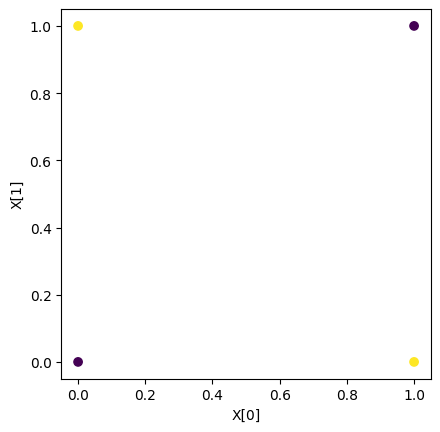

In [2]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
# Y is a matrix of N numners - answers
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [3]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def relu(x):
    x = x.clone()
    return torch.max(torch.tensor(0), x)

In [4]:
class SmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float64):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        a = torch.sqrt(torch.tensor(0.5))
        self.W1 = torch.randn_like(self.W1) * a
        self.b1 = torch.randn_like(self.b1) * a
        self.W2 = torch.randn_like(self.W2) * a
        self.b2 = torch.randn_like(self.b2) * a

    def forward(self, X, Y=None, do_backward=False, activation_f=sigmoid):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = torch.matmul(self.W1, X.t()) + self.b1.view(-1, 1)
        # Outputs after the sigmoid non-linearity
        O1 = activation_f(A1)
        # Inputs to neuron in the second layer
        A2 = torch.matmul(self.W2, O1) + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            # loss = -Y * torch.log(O2) - (1.0 - Y) * torch.log(1.0 - O2)
            loss = -(Y * torch.log(O2.view(-1,1)) + (1.0 - Y) * torch.log(1.0 - O2.view(-1,1)))
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            
            A2_grad = O2 - Y.t()
            self.b2_grad = A2_grad.sum(1) / X.shape[0]
            self.W2_grad = torch.mm(A2_grad, O1.t()) / X.shape[0]
            O1_grad = torch.mm(A2_grad.t(), self.W2).t()
            if activation_f == sigmoid: A1_grad = O1_grad * sigmoid(A1) * (1 - sigmoid(A1))
            if activation_f == relu: A1_grad = O1_grad * torch.where(A1 > 0, torch.tensor(1), torch.tensor(0))
            self.b1_grad = A1_grad.sum(1) / X.shape[0]
            self.W1_grad = torch.mm(A1_grad, X) / X.shape[0]

        return O2, loss

In [5]:
# # TODO Problem 1:
# # Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=torch.float64)
net.W1 = torch.tensor([
    [200.0, 200.0],
    [-100.0, -100.0]
], dtype=torch.float64)
net.b1 = torch.tensor([-100.0, 150.0], dtype=torch.float64) # 150 zamiast 200, zeby dla 1 i 1 bylo cos ponizej 0 
net.W2 = torch.tensor([[80.0, 80.0]], dtype=torch.float64) # 80 i 80 zamiast 100 i 100, zeby dla 0 i 1 bylo cos ponizej 0
net.b2 = torch.tensor([-100.0], dtype=torch.float64)

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large

predictions, loss = net.forward(X, Y)
for x, p in zip(X, predictions.t()):
    print(f"XOR{x} = {p[0]}")

XORtensor([0., 0.], dtype=torch.float64) = 2.0611536181902037e-09
XORtensor([0., 1.], dtype=torch.float64) = 1.0
XORtensor([1., 0.], dtype=torch.float64) = 1.0
XORtensor([1., 1.], dtype=torch.float64) = 2.0611536181902037e-09


## Problem 2

In [6]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = torch.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")

    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        # zmiana to dodanie item()
        orig_val = param_flat_accessor[i].item()
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert torch.allclose(grad, orig_grad)
    return grad, orig_grad

In [7]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [8]:
def gradient_descent(net, X, Y, alpha=0.1, verb=True, activation_f=sigmoid):
    for i in range(100000):
        predictions, loss = net.forward(X, Y, do_backward=True, activation_f=activation_f)
        if (i % 5000) == 0 and verb:
            print(f"after {i} steps \tloss={loss}")
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            # Hint: use the construct `param[:]` to change the contents of the array!
            # Doing instead `param = new_val` simply changes to what the variable
            # param points to, without affecting the network!
            # alternatively, you could do setattr(net, param_name, new_value)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
            params = {}
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                params[param_name] = param
    return predictions, loss, params

In [9]:
net = SmallNet(2, 10, dtype=torch.float64)
_ = gradient_descent(net, X, Y)

after 0 steps 	loss=0.9972983956289109
after 5000 steps 	loss=0.023346669369808382
after 10000 steps 	loss=0.008462899870110698
after 15000 steps 	loss=0.004977987219655445
after 20000 steps 	loss=0.003471084460612334
after 25000 steps 	loss=0.002641306970738741
after 30000 steps 	loss=0.0021198534732842023
after 35000 steps 	loss=0.0017635171277648966
after 40000 steps 	loss=0.0015054667293511763
after 45000 steps 	loss=0.001310457989378309
after 50000 steps 	loss=0.0011582006926570832
after 55000 steps 	loss=0.0010362143536924262
after 60000 steps 	loss=0.0009364139065039606
after 65000 steps 	loss=0.0008533385532001503
after 70000 steps 	loss=0.0007831711214004197
after 75000 steps 	loss=0.0007231654767915868
after 80000 steps 	loss=0.0006712970840610994
after 85000 steps 	loss=0.00062604162728831
after 90000 steps 	loss=0.0005862301917170243
after 95000 steps 	loss=0.0005509518591131217


In [90]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions.t()):
    print(f"XORnet({x}) = {p[0]}")
print(loss)

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.00021996611916289327
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.9996165946648877
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.9989816449633641
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.0009817055122461873
tensor(0.0007, dtype=torch.float64)


In [10]:
X3 = torch.tensor([
    [1, 1, 1],
    [1, 1, 0],
    [1, 0, 1],
    [1, 0, 0],
    [0, 1, 1],
    [0, 1, 0],
    [0, 0, 1],
    [0, 0, 0]
], dtype=torch.float64)

Y3 = torch.tensor([
    [1],
    [0],
    [0],
    [1],
    [0],
    [1],
    [1],
    [0]
], dtype=torch.float64)

In [34]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.

for hidden_dim in [2, 3, 5, 10, 20]:
    print(f"\nhidden_dim: {hidden_dim}\n")
    net = SmallNet(3, hidden_dim, dtype=torch.float64)
    predictions, loss, _ = gradient_descent(net, X3, Y3, verb=False)
    for x, p, y in zip(X3, predictions.t(), Y3):
        print(f"XORnet({x}) = {p[0]:<30}  {y[0]}")
    print(f"loss: {loss}")


hidden_dim: 2

XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.9984676645395061              1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.25066734941406216             0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.25066734786483924             0.0
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.25010355738959256             1.0
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.0024591837029728347           0.0
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.998380495600028               1.0
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.9983805058758991              1.0
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.2508701784113754              0.0
loss: 0.2823881352542268

hidden_dim: 3

XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.9959910269394442              1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.005370224905691728            0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.005353530

In [203]:
net = SmallNet(3, 1, dtype=torch.float64)
predictions, loss, _ = gradient_descent(net, X3, Y3, verb=False)
print("hidden_dim: 1")
for x, p, y in zip(X3, predictions.t(), Y3):
    print(f"XORnet({x}) = {p[0]:<30}  {y[0]}")
print(f"loss: {loss}")

hidden_dim: 1
XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.7480017427114387              1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.7496530773382224              0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.25170922525598327             0.0
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.7483323800926192              1.0
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.2517092252559569              0.0
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.7483323800925964              1.0
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.2501678847936934              1.0
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.25209498246992035             0.0
loss: 0.563887913127158


## Problem 4


In [40]:
net = SmallNet(2, 10, dtype=torch.float64)
_ = gradient_descent(net, X, Y, activation_f=relu)

after 0 steps 	loss=2.51157612662427
after 5000 steps 	loss=0.0017688986462826204
after 10000 steps 	loss=0.0007187055680339792
after 15000 steps 	loss=0.00043412426774645563
after 20000 steps 	loss=0.0003058476363965973
after 25000 steps 	loss=0.00023391235049685866
after 30000 steps 	loss=0.00018827015841722518
after 35000 steps 	loss=0.00015689644350372776
after 40000 steps 	loss=0.00013408968601134994
after 45000 steps 	loss=0.00011681535255607609
after 50000 steps 	loss=0.00010330637625945787
after 55000 steps 	loss=9.246655853310176e-05
after 60000 steps 	loss=8.359196618408125e-05
after 65000 steps 	loss=7.619876921120003e-05
after 70000 steps 	loss=6.995167389160241e-05
after 75000 steps 	loss=6.46066745721208e-05
after 80000 steps 	loss=5.9984346404830046e-05
after 85000 steps 	loss=5.595041582749973e-05
after 90000 steps 	loss=5.2402032488238944e-05
after 95000 steps 	loss=4.9256323283192755e-05


In [41]:
for hidden_dim in [2, 3, 5, 10, 20]:
    print(f"\nhidden_dim: {hidden_dim}\n")
    net = SmallNet(3, hidden_dim, dtype=torch.float64)
    predictions, loss, _ = gradient_descent(net, X3, Y3, verb=False, activation_f=relu)
    for x, p, y in zip(X3, predictions.t(), Y3):
        print(f"XORnet({x}) = {p[0]:<30}  {y[0]}")
    print(f"loss: {loss}")


hidden_dim: 2

XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.5714152267205649              1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.5714152267205649              0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.5714152267205649              0.0
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.5714152267205649              1.0
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.5714152267205649              0.0
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.5714152267205649              1.0
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.5714152267205649              1.0
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 9.328965162088237e-05           0.0
loss: 0.5975562536814671

hidden_dim: 3

XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.49982301138488683             1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.4983928985873626              0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.501832943

In [204]:
net = SmallNet(3, 1, dtype=torch.float64)
predictions, loss, _ = gradient_descent(net, X3, Y3, verb=False, activation_f=relu)
print("hidden_dim: 1")
for x, p, y in zip(X3, predictions.t(), Y3):
    print(f"XORnet({x}) = {p[0]:<30}  {y[0]}")
print(f"loss: {loss}")

hidden_dim: 1
XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.5                             1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.5                             0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.5                             0.0
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.5                             1.0
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.5                             0.0
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.5                             1.0
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.5                             1.0
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.5                             0.0
loss: 0.6931471805599453


## Problem 5

In [159]:
class SmallNet2layers:
    def __init__(self, in_features: int, num_hidden_first: int, num_hidden_second, dtype=torch.float64):
        self.W1 = torch.zeros((num_hidden_first, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden_first,), dtype=dtype)
        self.W2 = torch.zeros((num_hidden_second, num_hidden_first), dtype=dtype)
        self.b2 = torch.zeros((num_hidden_second,), dtype=dtype)
        self.W3 = torch.zeros((1, num_hidden_second), dtype=dtype)
        self.b3 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        a = torch.sqrt(torch.tensor(0.5))
        self.W1 = torch.randn_like(self.W1) * a
        self.b1 = torch.randn_like(self.b1) * a
        self.W2 = torch.randn_like(self.W2) * a
        self.b2 = torch.randn_like(self.b2) * a
        self.W3 = torch.randn_like(self.W3) * a
        self.b3 = torch.randn_like(self.b3) * a

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = torch.matmul(self.W1, X.t()) + self.b1.view(-1, 1)
        # Outputs after the non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = torch.matmul(self.W2, O1) + self.b2.view(-1, 1)
        # Outputs after the non-linearity
        O2 = sigmoid(A2)
        # Inputs to neuron in the third layer
        A3 = torch.matmul(self.W3, O2) + self.b3
        # Outputs after the non-linearity
        O3 = sigmoid(A3)
        
        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            # loss = -Y * torch.log(O2) - (1.0 - Y) * torch.log(1.0 - O2)
            loss = -(Y * torch.log(O3.view(-1,1)) + (1 - Y) * torch.log(1.0 - O3.view(-1,1)))
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss

            A3_grad = O3 - Y.t()
            self.b3_grad = A3_grad.sum(1) / X.shape[0]
            self.W3_grad = torch.mm(A3_grad, O2.t()) / X.shape[0]
            # O2_grad = A3_grad * self.W3.t()
            O2_grad = torch.mm(A3_grad.t(), self.W3).t()
            A2_grad = O2_grad * sigmoid(A2) * (1 - sigmoid(A2))
            self.b2_grad = A2_grad.sum(1) / X.shape[0]
            self.W2_grad = torch.mm(A2_grad, O1.t()) / X.shape[0]
            O1_grad = torch.mm(A2_grad.t(), self.W2).t()
            A1_grad = O1_grad * sigmoid(A1) * (1 - sigmoid(A1))
            self.b1_grad = A1_grad.sum(1) / X.shape[0]
            self.W1_grad = torch.mm(A1_grad, X) / X.shape[0]
            

        return O2, loss

In [160]:
net = SmallNet2layers(2, 2, 3, dtype=torch.float64)
predictions, loss = net.forward(X, Y)
for x, p in zip(X, predictions.t()):
    print(f"XOR{x} = {p[0]}")

XORtensor([0., 0.], dtype=torch.float64) = 0.6576126202253052
XORtensor([0., 1.], dtype=torch.float64) = 0.630105544720111
XORtensor([1., 0.], dtype=torch.float64) = 0.6241492667754761
XORtensor([1., 1.], dtype=torch.float64) = 0.5898905497166964


In [183]:
def gradient_descent_2layers(net, X, Y, alpha=0.1, verb=True, activation_f=sigmoid):
    for i in range(100000):
        predictions, loss = net.forward(X, Y, do_backward=True)
        if (i % 5000) == 0 and verb:
            print(f"after {i} steps \tloss={loss}")
        for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
            param = getattr(net, param_name)
            # Hint: use the construct `param[:]` to change the contents of the array!
            # Doing instead `param = new_val` simply changes to what the variable
            # param points to, without affecting the network!
            # alternatively, you could do setattr(net, param_name, new_value)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
            params = {}
            for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
                param = getattr(net, param_name)
                params[param_name] = param
    return predictions, loss, params

In [186]:
net = SmallNet2layers(2, 3, 1, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
    check_grad(net, param_name, X, Y)

In [187]:
_ = gradient_descent_2layers(net, X, Y)

after 0 steps 	loss=0.7904198816497141
after 5000 steps 	loss=0.6847329734261511
after 10000 steps 	loss=0.03078874329536345
after 15000 steps 	loss=0.0074702571907617685
after 20000 steps 	loss=0.004236960345834719
after 25000 steps 	loss=0.0029575715339959213
after 30000 steps 	loss=0.002272135014823259
after 35000 steps 	loss=0.0018449363188068185
after 40000 steps 	loss=0.0015531433336197686
after 45000 steps 	loss=0.0013411661139643184
after 50000 steps 	loss=0.001180183848645471
after 55000 steps 	loss=0.0010537627580224835
after 60000 steps 	loss=0.0009518466178915567
after 65000 steps 	loss=0.0008679364278682103
after 70000 steps 	loss=0.0007976451774811216
after 75000 steps 	loss=0.0007379042966739693
after 80000 steps 	loss=0.0006865029151593128
after 85000 steps 	loss=0.0006418077243972133
after 90000 steps 	loss=0.0006025859121013354
after 95000 steps 	loss=0.0005678894791873511


In [192]:
for hinnden_dim1, hidden_dim2 in [[2, 3], [2, 5], [2, 10], [5, 3], [5, 5], [5, 10], [10, 3], [10, 5], [10, 10]]:
    print(f"\nhidden_dim1: {hinnden_dim1}\thinnde_dim1: {hidden_dim2}\n")
    net = SmallNet2layers(3, hinnden_dim1, hidden_dim2, dtype=torch.float64)
    predictions, loss, _ = gradient_descent_2layers(net, X3, Y3,verb=False)
    for x, p, y in zip(X3, predictions.t(), Y3):
        print(f"XORnet({x}) = {p[0]:<30}  {y[0]}")
    print(f"loss: {loss}")


hidden_dim1: 2	hinnde_dim1: 3

XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.01925074289325209             1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.03040744382696835             0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.012848370341037103            0.0
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.01922830018113818             1.0
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.030409782054823416            0.0
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.913613311753623               1.0
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.01922830206494403             1.0
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.03145957697909435             0.0
loss: 0.04424086451077041

hidden_dim1: 2	hinnde_dim1: 5

XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.24463232334088228             1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.13410386481854106             0.0
XORnet(tensor([1., 0., 1.], dt

## Problem 6

In [158]:
class MultipleHiddenLayerNet:
    def __init__(self, in_features: int, nums_hidden: List[int], depth: int, dtype=torch.float64):
        assert len(nums_hidden) == depth

        setattr(self, "W1", torch.zeros((nums_hidden[0], in_features), dtype=dtype))
        setattr(self, "b1", torch.zeros((nums_hidden[0],), dtype=dtype))

        for i in range(2, depth+1):
            setattr(self, f"W{i}", torch.zeros((nums_hidden[i - 1], nums_hidden[i - 2]), dtype=dtype))
            setattr(self, f"b{i}", torch.zeros((nums_hidden[i - 1],), dtype=dtype))

        setattr(self, f"W{depth + 1}", torch.zeros((1, nums_hidden[-1]), dtype=dtype))
        setattr(self, f"b{depth + 1}", torch.zeros((1,), dtype=dtype))

        self.depth = depth
        self.init_params()

    def init_params(self):
        for i in range(1, self.depth + 1):
            setattr(self, f"W{i}", torch.nn.init.normal_(getattr(self, f"W{i}"), std=0.5))
            setattr(self, f"b{i}", torch.nn.init.normal_(getattr(self, f"b{i}"), std=0.5))

    def forward(self, X, Y=None, do_backward=False, activation_f=sigmoid):
        A = [0 for i in range(self.depth + 1)]
        O = [0 for i in range(self.depth + 1)]

        A[0] = torch.matmul(getattr(self, "W1"), X.t()) + getattr(self, "b1").view(-1, 1)
        O[0] = activation_f(A[0])

        for i in range(1, self.depth):
            A[i] = torch.matmul(getattr(self, f"W{i + 1}"), O[i - 1]) + getattr(self, f"b{i + 1}").view(-1, 1)
            O[i] = activation_f(A[i])
        A[-1] = torch.matmul(getattr(self, f"W{self.depth + 1}"), O[self.depth - 1]) + getattr(self, f"b{self.depth + 1}").view(-1, 1)
        O[-1] = activation_f(A[-1])
        
        if Y is not None:
            loss = -(Y * torch.log(O[-1].view(-1,1)) + (1 - Y) * torch.log(1.0 - O[-1].view(-1,1)))
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A_grad = [0 for i in range(self.depth + 1)]
            O_grad = [0 for i in range(self.depth + 1)]

            A_grad[-1] = O[-1] - Y.t()
            setattr(self, f"b{self.depth + 1}_grad", A_grad[-1].sum(1) / X.shape[0])
            setattr(self, f"W{self.depth + 1}_grad", torch.mm(A_grad[-1], O[-2].t()) / X.shape[0])

            for i in range(self.depth-1, 0, -1):
                O_grad[i] = torch.mm(A_grad[i+1].t(), getattr(self, f"W{i+2}")).t()
                if activation_f == sigmoid: A_grad[i] = O[i] * sigmoid(A[i]) * (1 - sigmoid(A[i]))
                elif activation_f == relu: relu: A_grad[i] = O[i] * torch.where(A[i] > 0, torch.tensor(1), torch.tensor(0))
                setattr(self, f"b{i+1}_grad", A_grad[i].sum(1) / X.shape[0])
                setattr(self, f"W{i+1}_grad", torch.mm(A_grad[i], O[i-1].t()) / X.shape[0])

            O_grad[0] = torch.mm(A_grad[1].t(), getattr(self, "W2")).t()
            if activation_f == sigmoid: A_grad[0] = O[0] * sigmoid(A[0]) * (1 - sigmoid(A[0]))
            elif activation_f == relu: A_grad[0] = O[0] * torch.where(A[0] > 0, torch.tensor(1), torch.tensor(0))
            setattr(self, f"b1_grad", A_grad[0].sum(1) / X.shape[0])
            setattr(self, f"W1_grad", torch.mm(A_grad[0], X) / X.shape[0])

        return O[-1], loss

In [159]:
def gradient_descent_multiple_layers(net, X, Y, alpha=0.1, verb=True, activation_f=sigmoid):
    for j in range(100000):
        predictions, loss = net.forward(X, Y, do_backward=True)
        if (j % 5000) == 0 and verb:
            print(f"after {i} steps \tloss={loss}")
        for i in range(1, net.depth + 2):
            param_W = getattr(net, f"W{i}")
            param_b = getattr(net, f"b{i}")
            param_W[:] = param_W - alpha * getattr(net, f"W{i}" + "_grad")
            param_b[:] = param_b - alpha * getattr(net, f"b{i}" + "_grad")
        params = {}
        for i in range(1, net.depth + 2):
            param_W = getattr(net, f"W{i}")
            param_b = getattr(net, f"b{i}")
            params[f"W{i}"] = param_W
            params[f"b{i}"] = param_b
    return predictions, loss, params

In [160]:
net = MultipleHiddenLayerNet(3, [3, 3], 2, dtype=torch.float64)
predictions, loss, _ = gradient_descent_multiple_layers(net, X3, Y3, verb=False, activation_f=sigmoid)
for x, p, y in zip(X3, predictions.t(), Y3):
    print(f"XORnet({x}) = {p[0]:<30}  {y[0]}")
print(f"loss: {loss}")

XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.5000031083269908              1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.5000022489390996              0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.5000021259574553              0.0
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.49999918609618793             1.0
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.5000023548176442              0.0
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.49999984121424856             1.0
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.4999995602655826              1.0
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.49999123309786453             0.0
loss: 0.6931462473128395


In [188]:
class VariableHiddenLayerNet:
    def __init__(self, in_features: int, num_hidden: List[int], depth: int, dtype=torch.float64):
        self.depth = depth

        # input layer
        setattr(self, "W1", torch.zeros((num_hidden[0], in_features), dtype=dtype))
        setattr(self, "b1", torch.zeros((num_hidden[0],), dtype=dtype))

        # hidden layers
        for i in range(2, depth):
            setattr(self, f"W{i}", torch.zeros((num_hidden[i-1], num_hidden[i-2]), dtype=dtype))
            setattr(self, f"b{i}", torch.zeros((num_hidden[i-1],), dtype=dtype))

        # output layer
        setattr(self, f"W{depth}", torch.zeros((1, num_hidden[-2]), dtype=dtype))
        setattr(self, f"b{depth}", torch.zeros((1,), dtype=dtype))

        self.init_params()

    def init_params(self):
        # set all parameters to small random values, e.g. from N(0, 0.5)
        for i in range(1, self.depth+1):
            setattr(self, f"W{i}", torch.nn.init.normal_(getattr(self, f"W{i}"), std=0.5))
            setattr(self, f"b{i}", torch.nn.init.normal_(getattr(self, f"b{i}"), std=0.5))

    def forward(self, X, Y=None, do_backward=False, first_activation_f = sigmoid):
        A = [0 for i in range(self.depth)]
        O = [0 for i in range(self.depth)]

        # input layer
        A[0] = torch.mm(X, getattr(self, "W1").T) + getattr(self, "b1")
        O[0] = first_activation_f(A[0])

        # hidden and output layers
        for i in range(1, self.depth):
            A[i] = torch.mm(O[i-1], getattr(self, f"W{i+1}").T) + getattr(self, f"b{i+1}")
            O[i] = first_activation_f(A[i])

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -(Y * torch.log(O[self.depth-1]) + (1 - Y) * torch.log(1.0 - O[self.depth-1]))
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            # fill in the gradient computation
            A_grad = [0 for i in range(self.depth)]
            O_grad = [0 for i in range(self.depth)]

            # output layer backpropagation
            A_grad[self.depth-1] = O[self.depth-1] - Y
            setattr(self, f"b{self.depth}_grad", A_grad[self.depth-1].sum(0) / A_grad[self.depth-1].shape[0])
            setattr(self, f"W{self.depth}_grad", torch.mm(A_grad[self.depth-1].T, O[self.depth-2]) / A_grad[self.depth-1].shape[0])

            # hidden layers backpropagation
            for i in range(self.depth-2, 0, -1):
                O_grad[i] = torch.mm(A_grad[i+1], getattr(self, f"W{i+2}"))

                if first_activation_f == sigmoid:
                    A_grad[i] = O_grad[i] * sigmoid(A[i]) * (1 - sigmoid(A[i]))
                elif first_activation_f == relu:
                    A_grad[i] = O_grad[i] * relu(A[i])
                # set values of weights and biases
                setattr(self, f"b{i+1}_grad", A_grad[i].sum(0) / A_grad[i+1].shape[0])
                setattr(self, f"W{i+1}_grad", torch.mm(A_grad[i].T, O[i-1]) / A_grad[i].shape[0])

            # first layer backpropagation
            O_grad[0] = torch.mm(A_grad[1], getattr(self, "W2"))
            if first_activation_f == sigmoid:
                A_grad[0] = O_grad[0] * sigmoid(A[0]) * (1 - sigmoid(A[0]))
            elif first_activation_f == relu:
                A_grad[0] = O_grad[0] * relu(A[0])
            # set values of weights and biases
            setattr(self, f"b1_grad", A_grad[0].sum(0) / A_grad[1].shape[0])
            setattr(self, f"W1_grad", torch.mm(A_grad[0].T, X) / A_grad[0].shape[0])
        return O[self.depth-1], loss

In [189]:
def grad_desc(net, alpha, X, Y, first_activation_f = sigmoid, verbose = False):
    for i in range(100_000):
        _, loss = net.forward(X, Y, do_backward=True, first_activation_f=first_activation_f)
        if (i % 5_000) == 0 and verbose:
            print(f"after {i} steps \tloss={loss}")
        for layer in range(1, net.depth + 1): # Loop over the layers from 1 to n
            param_name_W = "W" + str(layer)
            param_name_b = "b" + str(layer)
            param_W = getattr(net, param_name_W)
            param_b = getattr(net, param_name_b)
            param_W[:] = param_W - alpha * getattr(net, param_name_W + "_grad")
            param_b[:] = param_b - alpha * getattr(net, param_name_b + "_grad")
    params = {} # Initialize an empty dictionary to store the parameters
    for layer in range(1, net.depth + 1): # Loop over the layers from 1 to n
        param_name_W = "W" + str(layer)
        param_name_b = "b" + str(layer)
        param_W = getattr(net, param_name_W)
        param_b = getattr(net, param_name_b)
        params[param_name_W] = param_W
        params[param_name_b] = param_b

    return _, loss, params

In [190]:
net = VariableHiddenLayerNet(3, [5, 3, 1], 3, dtype=torch.float64)
predictions, loss, params = grad_desc(net, 0.1, X3, Y3)
print(f"Loss for training with {3} layers and {3} neurons each was {loss}")
for x, p, y in zip(X3, predictions, Y3):
    print(f"XORnet({x}) = {p[0]:<30}  {y[0]}")

Loss for training with 3 layers and 3 neurons each was 0.00026705788907207905
XORnet(tensor([1., 1., 1.], dtype=torch.float64)) = 0.9999089076758064              1.0
XORnet(tensor([1., 1., 0.], dtype=torch.float64)) = 0.00035014165698536574          0.0
XORnet(tensor([1., 0., 1.], dtype=torch.float64)) = 0.000322583838007273            0.0
XORnet(tensor([1., 0., 0.], dtype=torch.float64)) = 0.9997393812214423              1.0
XORnet(tensor([0., 1., 1.], dtype=torch.float64)) = 0.0003528421468318999           0.0
XORnet(tensor([0., 1., 0.], dtype=torch.float64)) = 0.9997632902700109              1.0
XORnet(tensor([0., 0., 1.], dtype=torch.float64)) = 0.9997244162777705              1.0
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.0002465807745712568           0.0


## Problem 7